In [123]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

(60000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 

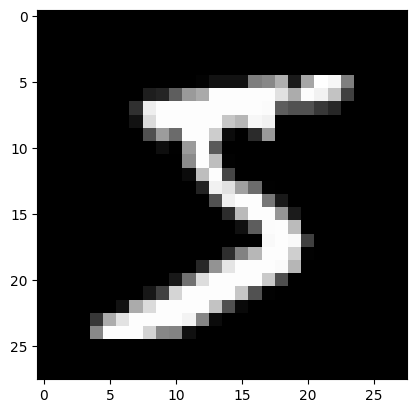

In [101]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check the shape and type of data

print(x_train.shape)
print(x_train.dtype)

# Print the first training image
print(x_train[0])
# Print the label of first training image
print("number: " + str(y_train[0]))

# Normalize the value b/w 0 and 1
(x_train, x_test) = (x_train / 255.0, x_test / 255.0)

# Print the grayscale image of first training image
plt.imshow(x_train[0], cmap='gray', vmin=0, vmax=1)

In [102]:
# Build a model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)), # First layer, takes 28x28 image
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10) # Final layer, outputs 10 values, each corresponds to probability of the number
    ],
    name='MyModel'
)

In [103]:
print(model.name)
print(model.layers)

MyModel
[<keras.layers.reshaping.flatten.Flatten object at 0x000001ED3C5F3F90>, <keras.layers.core.dense.Dense object at 0x000001ED3C6CD810>, <keras.layers.regularization.dropout.Dropout object at 0x000001ED3C717E90>, <keras.layers.core.dense.Dense object at 0x000001ED3C617350>]


In [111]:
# logits or log-odds scores for each class
predictions = model(x_train[:1]).numpy()
print(predictions)

# This function converts the logits to probabilities
probabilities = tf.nn.softmax(predictions).numpy()
print(probabilities)

[[-13.70863    -2.3153331  -4.887876   10.49737   -23.606953   12.922652
  -16.724669   -4.8233824 -11.645299   -2.5486674]]
[[2.4967259e-12 2.2152207e-07 1.6911267e-08 8.1264943e-02 1.2548269e-16
  9.1873455e-01 1.2232709e-13 1.8037866e-08 1.9654610e-11 1.7542096e-07]]


In [107]:
# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.0310216

In [108]:
# We need to compile because the model needs the loss function
# and some other parameters as well
model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy']
             )

In [113]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0647 - accuracy: 0.9791
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0568 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0472 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0428 - accuracy: 0.9862


In [114]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0706 - accuracy: 0.9813 - 251ms/epoch - 803us/step


[0.07056628912687302, 0.9812999963760376]

1/1 [==============================] - 0s 19ms/step
predicted number: 6


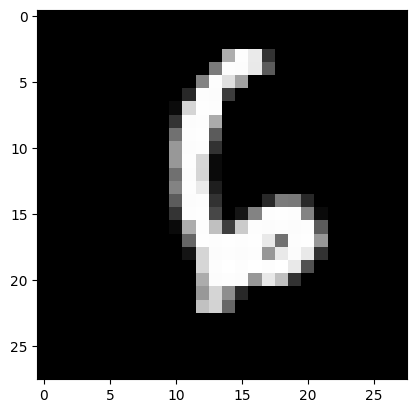

In [151]:
n_test = x_test.shape[0]
i = random.randint(0, n_test-1)
plt.imshow(x_test[i], cmap='gray')
predictions = model.predict(x_test[i : i+1])

for i in range(10):
    if(predictions[0][i] == max(predictions[0])):
        print('predicted number: ' + str(i))